In [ ]:
  !pip install prophet

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# import io

# from google.colab import files
# uploaded = files.upload()
# # chicago_df_1 = pd.read_csv(io.BytesIO(uploaded['Chicago_Crimes_2005_to_2007'], error_bad_lines = False))

In [ ]:
# import io

# from google.colab import files
# uploaded = files.upload()
# chicago_df_2 = pd.read_csv(io.BytesIO(uploaded['Chicago_Crimes_2008_to_2011'], error_bad_lines = False))

In [ ]:
# import io

# from google.colab import files
# uploaded = files.upload()
# chicago_df_3 = pd.read_csv(io.BytesIO(uploaded['Chicago_Crimes_2012_to_2017'], error_bad_lines = False))

In [ ]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

<ipython-input-24-8303a1c1f0ce>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
<ipython-input-24-8303a1c1f0ce>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
<ipython-input-24-8303a1c1f0ce>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
<ipython-input-24-8303a1c1f0ce>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
<ipython-input-24-83

In [ ]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [ ]:
chicago_df.shape

(122409, 23)

In [ ]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626.0,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627.0,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628.0,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629.0,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630.0,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [ ]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [ ]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
43176,01/25/2015 11:50:00 AM,004XX S KOSTNER AVE,NARCOTICS,POSS: SYNTHETIC DRUGS,PARKING LOT/GARAGE(NON.RESID.),True,False
43177,01/25/2015 01:00:00 PM,031XX W 63RD ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True
43178,01/25/2015 12:15:00 PM,047XX W IRVING PARK RD,THEFT,$500 AND UNDER,DEPARTMENT STORE,False,False
43179,01/24/2015 06:30:00 PM,005XX N MICHIGAN AVE,THEFT,$500 AND UNDER,DEPARTMENT STORE,False,False


In [ ]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_df.Date

0       2006-04-02 13:00:00
1       2006-02-26 13:40:48
2       2006-01-08 23:16:00
3       2006-04-05 18:45:00
4       2006-02-17 21:03:14
                ...        
43176   2015-01-25 11:50:00
43177   2015-01-25 13:00:00
43178   2015-01-25 12:15:00
43179   2015-01-24 18:30:00
43180                   NaT
Name: Date, Length: 122409, dtype: datetime64[ns]

In [ ]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [ ]:
chicago_df['Primary Type'].value_counts()

THEFT                                25761
BATTERY                              22064
CRIMINAL DAMAGE                      13947
NARCOTICS                            13254
OTHER OFFENSE                         7790
ASSAULT                               7489
BURGLARY                              6162
DECEPTIVE PRACTICE                    5973
MOTOR VEHICLE THEFT                   5081
ROBBERY                               4366
CRIMINAL TRESPASS                     3346
WEAPONS VIOLATION                     1270
PROSTITUTION                          1248
OFFENSE INVOLVING CHILDREN            1159
PUBLIC PEACE VIOLATION                 761
CRIM SEXUAL ASSAULT                    709
SEX OFFENSE                            559
HOMICIDE                               403
INTERFERENCE WITH PUBLIC OFFICER       283
ARSON                                  197
LIQUOR LAW VIOLATION                   193
GAMBLING                               123
KIDNAPPING                             102
STALKING   

In [ ]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

In [ ]:
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PROSTITUTION',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION'],
      dtype='object')

<Axes: xlabel='count', ylabel='Primary Type'>

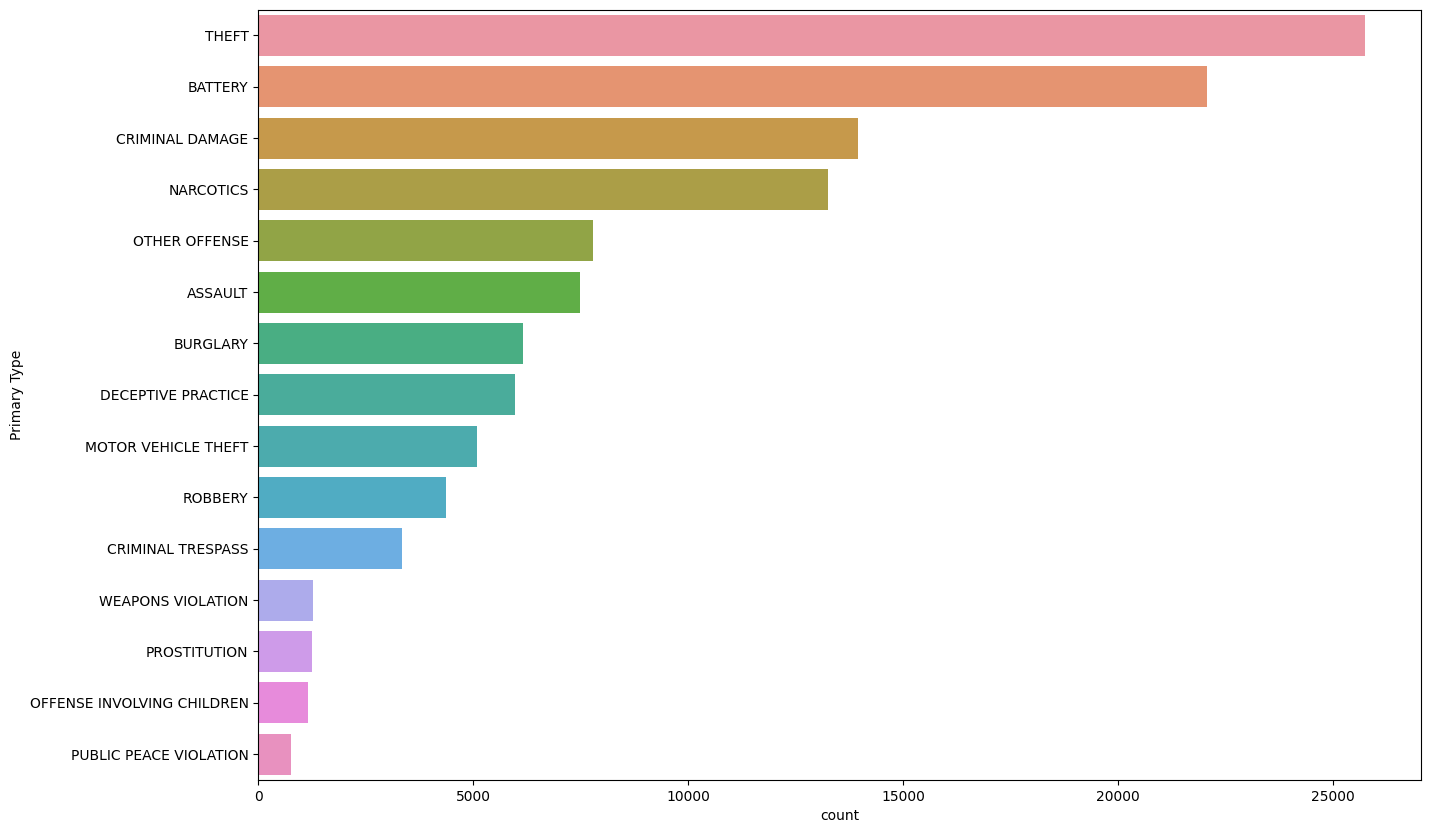

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data )

<Axes: xlabel='count', ylabel='Location Description'>

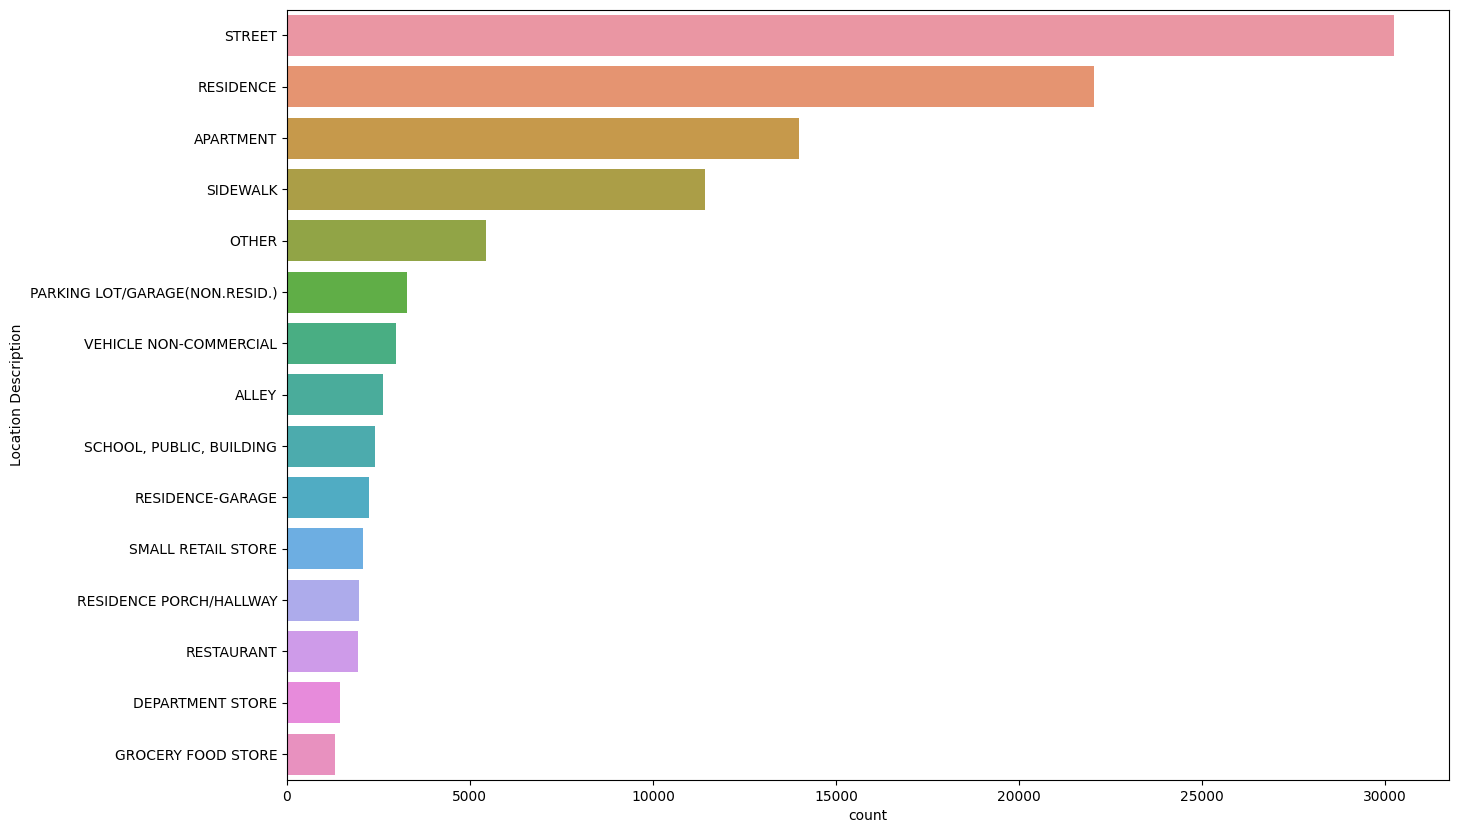

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
order = chicago_df['Location Description'].value_counts()

In [ ]:
order

STREET                                 30245
RESIDENCE                              22039
APARTMENT                              13990
SIDEWALK                               11408
OTHER                                   5445
                                       ...  
ROOMING HOUSE                              1
SCHOOL YARD                                1
CTA PROPERTY                               1
AIRPORT TRANSPORTATION SYSTEM (ATS)        1
HOTEL                                      1
Name: Location Description, Length: 121, dtype: int64

In [ ]:
chicago_df.resample('Y').size()

Date
2005-12-31      670
2006-12-31    37053
2007-12-31        0
2008-12-31    33253
2009-12-31     6222
2010-12-31     1493
2011-12-31      535
2012-12-31      624
2013-12-31     1850
2014-12-31     3049
2015-12-31    15345
2016-12-31    22312
dtype: int64

Text(0, 0.5, 'Number of Crimes')

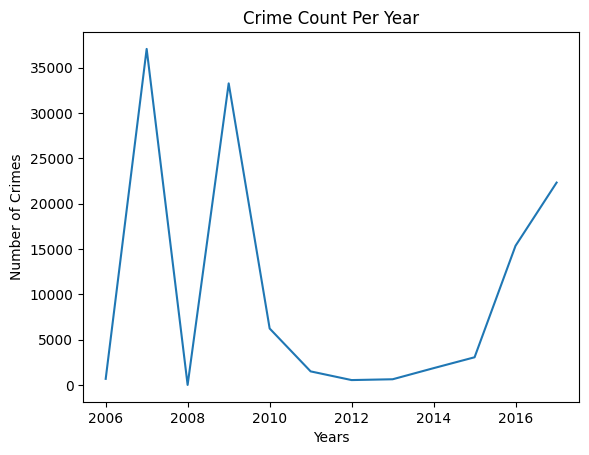

In [ ]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

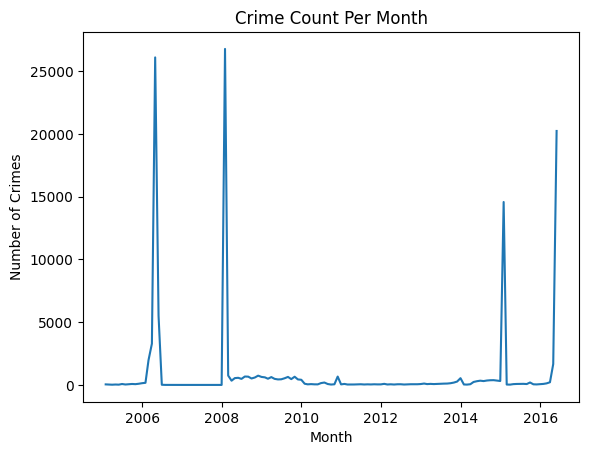

In [ ]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

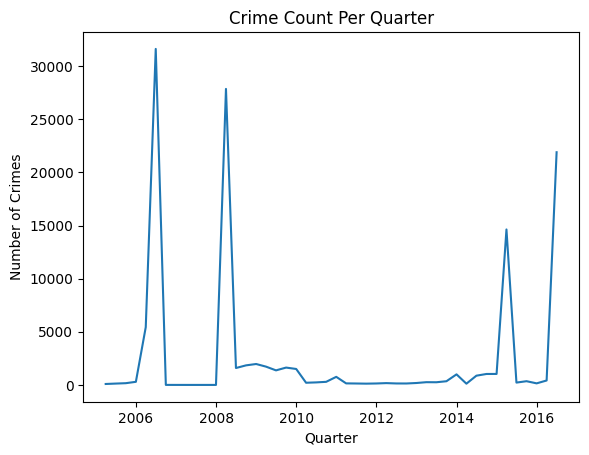

In [ ]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [ ]:
chicago_prophet

,Date,0
0,2005-01-31,43
1,2005-02-28,27
2,2005-03-31,18
3,2005-04-30,32
4,2005-05-31,22
...,...,...
132,2016-01-31,81
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 0 : 'y'})

In [ ]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,43
1,2005-02-28,27
2,2005-03-31,18
3,2005-04-30,32
4,2005-05-31,22
...,...,...
132,2016-01-31,81
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [ ]:
chicago_prophet_df_final['y'] = chicago_prophet_df_final['y'].astype(float)

In [ ]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,43.0
1,2005-02-28,27.0
2,2005-03-31,18.0
3,2005-04-30,32.0
4,2005-05-31,22.0
...,...,...
132,2016-01-31,81.0
133,2016-02-29,123.0
134,2016-03-31,213.0
135,2016-04-30,1663.0


In [ ]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzihlglo/bktu5y3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzihlglo/zn460ul5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2295', 'data', 'file=/tmp/tmpzzihlglo/bktu5y3l.json', 'init=/tmp/tmpzzihlglo/zn460ul5.json', 'output', 'file=/tmp/tmpzzihlglo/prophet_modelklp2f5wu/prophet_model-20231030153803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:38:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:38:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 699)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,1429.724259,-1357.664984,7837.054768,1429.724259,1429.724259,1734.642359,1734.642359,1734.642359,1734.642359,1734.642359,1734.642359,0.0,0.0,0.0,3164.366618
1,2005-02-28,1424.653815,-3681.219228,5549.676606,1424.653815,1424.653815,-626.132301,-626.132301,-626.132301,-626.132301,-626.132301,-626.132301,0.0,0.0,0.0,798.521514
2,2005-03-31,1419.040108,-3467.530637,5062.576772,1419.040108,1419.040108,-629.825807,-629.825807,-629.825807,-629.825807,-629.825807,-629.825807,0.0,0.0,0.0,789.214301
3,2005-04-30,1413.607489,-1408.787810,7147.284347,1413.607489,1413.607489,1313.084367,1313.084367,1313.084367,1313.084367,1313.084367,1313.084367,0.0,0.0,0.0,2726.691857
4,2005-05-31,1407.993783,-1837.886529,7113.154100,1407.993783,1407.993783,1410.145018,1410.145018,1410.145018,1410.145018,1410.145018,1410.145018,0.0,0.0,0.0,2818.138800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2018-04-26,554.660075,-200.833970,8792.088156,554.656733,554.663285,3842.509964,3842.509964,3842.509964,3842.509964,3842.509964,3842.509964,0.0,0.0,0.0,4397.170038
832,2018-04-27,554.479046,-437.771220,8375.520060,554.475698,554.482263,3354.167151,3354.167151,3354.167151,3354.167151,3354.167151,3354.167151,0.0,0.0,0.0,3908.646197
833,2018-04-28,554.298018,-1018.068290,7661.579057,554.294662,554.301241,2797.521572,2797.521572,2797.521572,2797.521572,2797.521572,2797.521572,0.0,0.0,0.0,3351.819591
834,2018-04-29,554.116990,-1796.824209,7010.542844,554.113626,554.120219,2175.644177,2175.644177,2175.644177,2175.644177,2175.644177,2175.644177,0.0,0.0,0.0,2729.761168


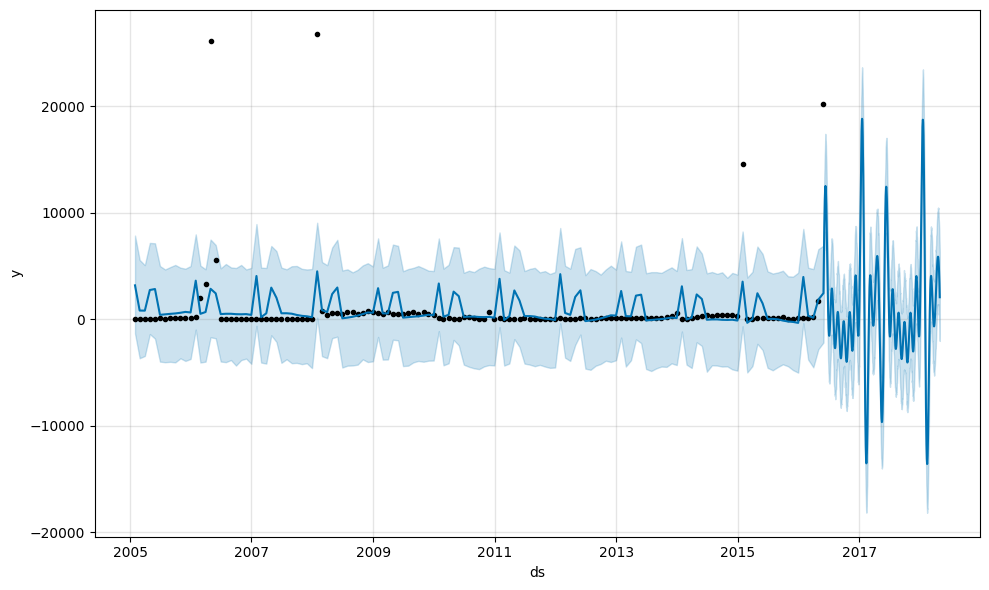

In [ ]:
fig1 = m.plot(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
import plotly.express as px

future = m.make_future_dataframe(periods=1000, freq='W')

forecast = m.predict(future)

# Create a weekly plot using Plotly Express
fig = px.line(forecast, x='ds', y='yhat', labels={'yhat': 'Weekly Forecast'})
fig.update_traces(line=dict(width=2), marker=dict(size=5))

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

df = pd.DataFrame({
    'ds': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'y': range(365)
})

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=10, freq='W')

# Forecast
forecast = model.predict(future)

# Create a Plotly figure for the forecast
fig = go.Figure()

# Add a trace for the forecasted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))




INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzihlglo/g55crr4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzihlglo/gqg4rqo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88096', 'data', 'file=/tmp/tmpzzihlglo/g55crr4g.json', 'init=/tmp/tmpzzihlglo/gqg4rqo7.json', 'output', 'file=/tmp/tmpzzihlglo/prophet_modelkcd6xvyn/prophet_model-20231030154740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


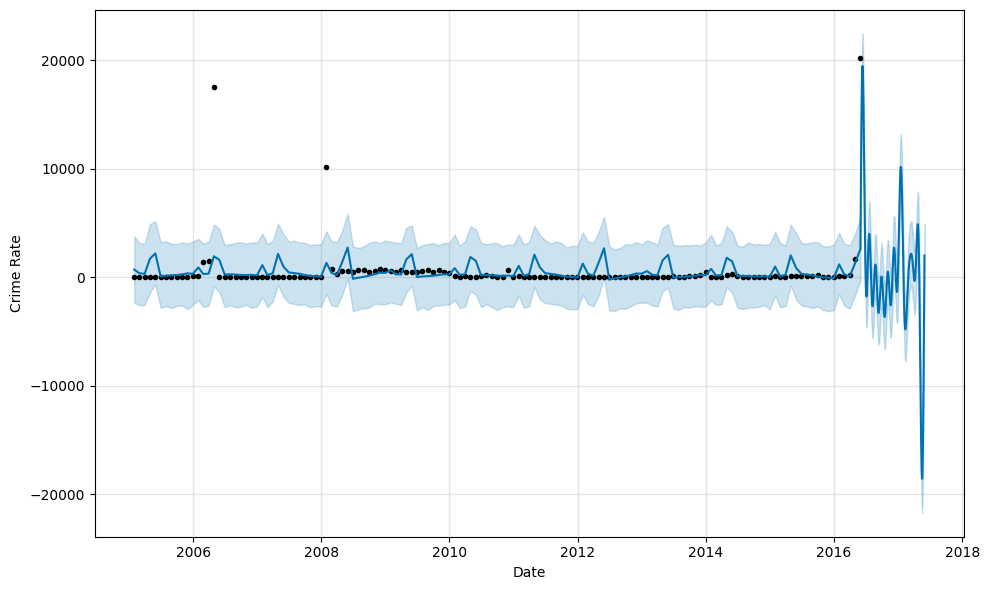

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

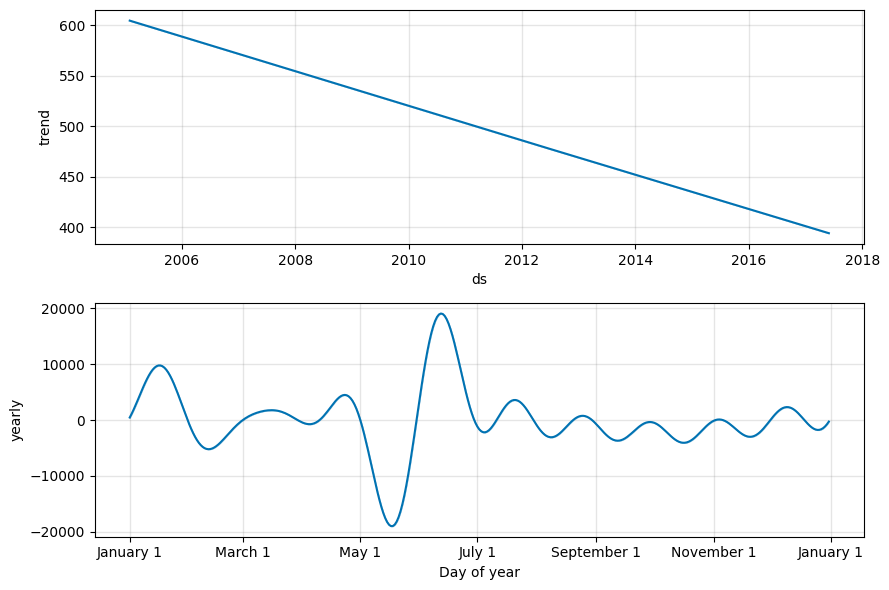

In [ ]:
figure = m.plot_components(forecast)

In [ ]:
import pickle

In [ ]:
# model_file = '/Users/pujar/OneDrive/Desktop'

In [ ]:
with open('prophet_model.pkl', 'wb') as model_file:
    pickle.dump(m, model_file)

In [ ]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2015-01-31 02:00:00,2015-01-31 02:00:00,016XX W 18TH ST,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False
2015-01-31 12:00:00,2015-01-31 12:00:00,003XX S HALSTED ST,BATTERY,SIMPLE,SIDEWALK,False,False
2015-01-31 09:30:00,2015-01-31 09:30:00,010XX E 80TH ST,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False


In [ ]:
X = chicago_prophet['Date']

In [ ]:
# temp = chicago_df['Primary Type'].value_counts()

In [ ]:
# y = chicago_df.resample('M').size().reset_index()

In [ ]:
# y = chicago_df[]


In [ ]:
# # X = X.values.reshape(-1, 1)  # Reshape to a 2D array
# y = y.values.ravel()  # Convert to a 1D array


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
# X_train.shape, X_test.shape

In [ ]:
import joblib

In [ ]:
with open('prophet_model1.pkl', 'wb') as model_file:
    joblib.dump(m, model_file)